# Exercise 9: Comparing data to predictions (20 points)

The exercise this week will allow you to gain some experience with comparing data to predictions, such as how well two variables are correlated.

### Tips for completing this exercise

- Use **exactly** the same variable names as in the instructions because your answers will be automatically graded, and the tests that grade your answers rely on following the same formatting or variable naming as in the instructions.
- **Please do not**:

    - **Change the file names**. Do all of your editing in the provided `Exercise-9-problems-1-3.ipynb` file (this file).
    - **Change the existing cell types**. You can add cells, but changing the cell types for existing cells (from code to markdown, for example) will also cause the automated grader to fail. 

## Problem 1: Linear data regression for detecting changing climate (8.5 points)

For this problem we will again use the NOAA climate data from previous exercises with a slight twist. As a reminder, you will be working with a climate data file from the [US National Oceanographic and Atmospheric Administration (NOAA) climate database](https://www.ncdc.noaa.gov/cdo-web/). In order to jump right into things, we have provided you with [a data file that has already been processed](data/seasonal-temps.csv) containing the means and standard deviations of seasonal temperatures (in Celsius) for winter and summer for the years 1966-2022. The first 5 lines of the data file are:

```
Year,Jan mean,Jan std,May temp,May std
1966,26.741935,0.478730,28.706452,1.139279
1967,26.119355,1.172865,29.219355,0.480569
1968,26.467742,0.813383,29.135484,0.526339
1969,26.100000,0.643428,29.016129,0.873726
```

Your task is to load this data and use a least squares regression to fit trendlines to the temperature data.

### Scores for this problem

**Your score on this problem will be based on following criteria**:

- Reading in the data file for this exercise
- Properly converting the linear regressions formulas to a Python function and adding it to your `gdam_functions.py` script file from Exercise 8
- Calculating the least-squares regression lines for "summer" (May) and winter (January), for two different time periods
- Plotting your results
- Including comments that explain what most lines in the code do
- Uploading your notebook **and script file** to your GitHub repository for this week's exercise

### Part 1: Reading the data file (1 point)

Your first task is to read in [the data file for this problem](data/seasonal-temps.csv).

- For this, you should use the Pandas `read_csv()` funtion to read in the data file [data/seasonal-temps.csv](data/seasonal-temps.csv) into the variable `data`
    - You do not need to skip any rows or specify an index column

In [1]:
# Import Pandas and NumPy
import pandas as pd

data = None

# YOUR CODE HERE
fp = 'data/seasonal-temps.csv'
data = pd.read_csv(fp)

In [2]:
# This test should print the first row of the data file
print("First row of the DataFrame:\n", data.head(1))


First row of the DataFrame:
    Year   Jan mean  Jan std   May mean   May std
0  1966  26.741935  0.47873  28.706452  1.139279


### Part 2: A linear regression function (1.5 points)

Your next task in this problem is to create a function that calculates the slopes `B` and *y*-intercepts `A` for [unweighted linear regression lines](https://introqg-site.readthedocs.io/en/latest/notebooks/L2/least-squares.html). As you may recall from the lesson, `A` and `B` can be calculated as

\begin{equation}
  \Large
  A = \frac{\sum{x^2} \sum{y} - \sum{x} \sum{x y}}{\Delta}
\end{equation}

and

\begin{equation}
  \Large
  B = \frac{N \sum{x y} - \sum{x} \sum{y}}{\Delta},
\end{equation}

where

\begin{equation}
  \Large
  \Delta = N \sum{x^2} - \left(\sum{x} \right)^2.
\end{equation}

- Create a function `linregress` in your `gdam_functions.py` script file that returns the slope `B` and *y*-intercept `A` for a regression line for data `x` and `y`.
    - **NOTE**: You can return both `A` and `B` in the same `return` statement by separating the values with a comma
    - **NOTE**: You may need to restart your kernel in order for the new function to be imported. You may receive an `ImportError` otherwise.

In [3]:
# Import your new function below using the format "from gdam_functions import linregress"
# (just copy and paste the text in quotes above in place of "raise NotImplementedError()")

# YOUR CODE HERE
from gdam_functions_updated import linregress

In [4]:
# These visible tests with fake data should work
import numpy as np
from nose.tools import ok_, assert_equal

# Fake data for linregress tests
x1 = np.array([1.0, 2.0])
y1 = np.array([1.0, 2.0])
x2 = np.array([1.0, 2.0, 2.5, 3.6, 4.2, 5.9])
y2 = np.array([1.0, 2.0, 2.7, 3.1, 4.7, 5.7])

# Fake line slopes, intercepts
a1, b1 = linregress(x1, y1)
a2, b2 = linregress(x2, y2)

# Print results
print(f"Slope and intercept for dataset 1: {b1:.4f} and {a1:.4f}.")
print(f"Slope and intercept for dataset 2: {b2:.4f} and {a2:.4f}.")

# Check that the linregress function works
assert_equal(a1, 0.0)
assert_equal(b1, 1.0)
assert_equal(round(a2, 4), 0.0799)
assert_equal(round(b2, 4), 0.975)

Slope and intercept for dataset 1: 1.0000 and 0.0000.
Slope and intercept for dataset 2: 0.9750 and 0.0799.


/srv/conda/envs/notebook/lib/python3.10/site-packages/nose/plugins/manager.py:418: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


### Part 3: Calculating seasonal regression lines (1.5 points)

Now we can calculate the slopes and y-intercepts for our weather data to determine how summer and winter temperatures have varied over the observation period. We'll do this for two time ranges: The **entire observation period** and the **last 20 years (2003-2022)**.

- Use your `linregress` function to calculate the slopes and intercepts for summer and winter for the time periods mentioned above (the entire range of years, and 2003-2022).
You should name these values as follows:
    - Entire range of years: `A_winter` and `B_winter` for winter, `A_summer` and `B_summer` for summer
    - Last 20 years: `A_winter20` and `B_winter20` for winter, `A_summer20` and `B_summer20` for summer

**Hint**: In this problem, `x` will be your time data, and `y` will be your temperatures.

In [5]:
# Your calculations go below.
# Note: Replace both of the 'None' values with a single call of linregress() on each line

#arrays for entire observation period
x_time = np.array(data['Year'])
y_summer = np.array(data['May mean'])
y_winter = np.array(data['Jan mean'])

#arrays for the last 20 years
x_time20 = np.array(
    data['Year'].loc
    [(data['Year'] >= 2003) &
    (data['Year'] <= 2022)]
)

y_winter20 = np.array(
    data['Jan mean'].loc
    [(data['Year'] >= 2003) & 
    (data['Year'] <= 2022)]
)

y_summer20 = np.array(data['May mean'].loc
    [(data['Year'] >= 2003) & 
    (data['Year'] <= 2022)]
)
                    

# YOUR CODE HERE
#linregress results
A_winter, B_winter = linregress(x_time, y_winter)
A_summer, B_summer = linregress(x_time, y_summer)
A_winter20, B_winter20 = linregress(x_time20, y_winter20)
A_summer20, B_summer20 = linregress(x_time20, y_summer20)

In [6]:
###### This test should work
print(f"Winter (all years) slope: {B_winter:.5f}. Expected value: 0.00536.")
print(f"Winter (all years) intercept {A_winter:.1f}. Expected value: 16.0")


Winter (all years) slope: 0.00536. Expected value: 0.00536.
Winter (all years) intercept 16.0. Expected value: 16.0


In [7]:
# This test should work
print(f"Summer (last 20 years) slope: {B_summer20:.5f}. Expected value: 0.02437.")
print(f"Summer (last 20 years) intercept: {A_summer20:.1f}. Expected value: -19.8.")


Summer (last 20 years) slope: 0.02437. Expected value: 0.02437.
Summer (last 20 years) intercept: -19.8. Expected value: -19.8.


### Part 4: Plotting your results (4.5 points)

Your last coding task for this problem is to create some plots of your seasonal temperature data and their trendlines. An example of the types of plots you should create are below.
**Note**: You could create two separate plots for the different time periods, and not use subplots as shown in the example below.

![Temperature trends in Helsinki](img/temp-slopes.png)

- Create 2 plots of the seasonal temperature data: (**1**) one for the entire time covered in the data and (**2**) another for the last 20 years of data
    - Plot the seasonal average temperature data as a Pandas scatter plot with error bars showing the standard deviation in seasonal temperature
    - Also plot the regression lines for each season as well to compare to the yearly temperature data. You may want to consult [the hints for this week's exercise](https://geo-python-upd.readthedocs.io/en/latest/lessons/L9/exercise-9.html#general-hints-for-exercise-9) about how to plot the regression lines.
    - Plot the temperature data for both seasons on the same plot, using a warm color (e.g., red) for summer and a cool color (e.g., blue) for winter. You can find some convenient color names you can use in the [Matplotlib documentation online](https://matplotlib.org/stable/gallery/color/named_colors.html).
    - Be sure to set the figure size to be slightly larger, as was done in Exercise 1
- Include axis labels, a title and a legend for each plot, as well as text displaying the slope of the regression lines for both the summer and winter seasons
    - If your plot legend is empty, be sure that you have a label included for the scatter plot for each season with the text name of that season
- Add figure captions in the Markdown cell below each Python cell for your plots that describe the plots as if they were in a scientific journal article

<ErrorbarContainer object of 3 artists>

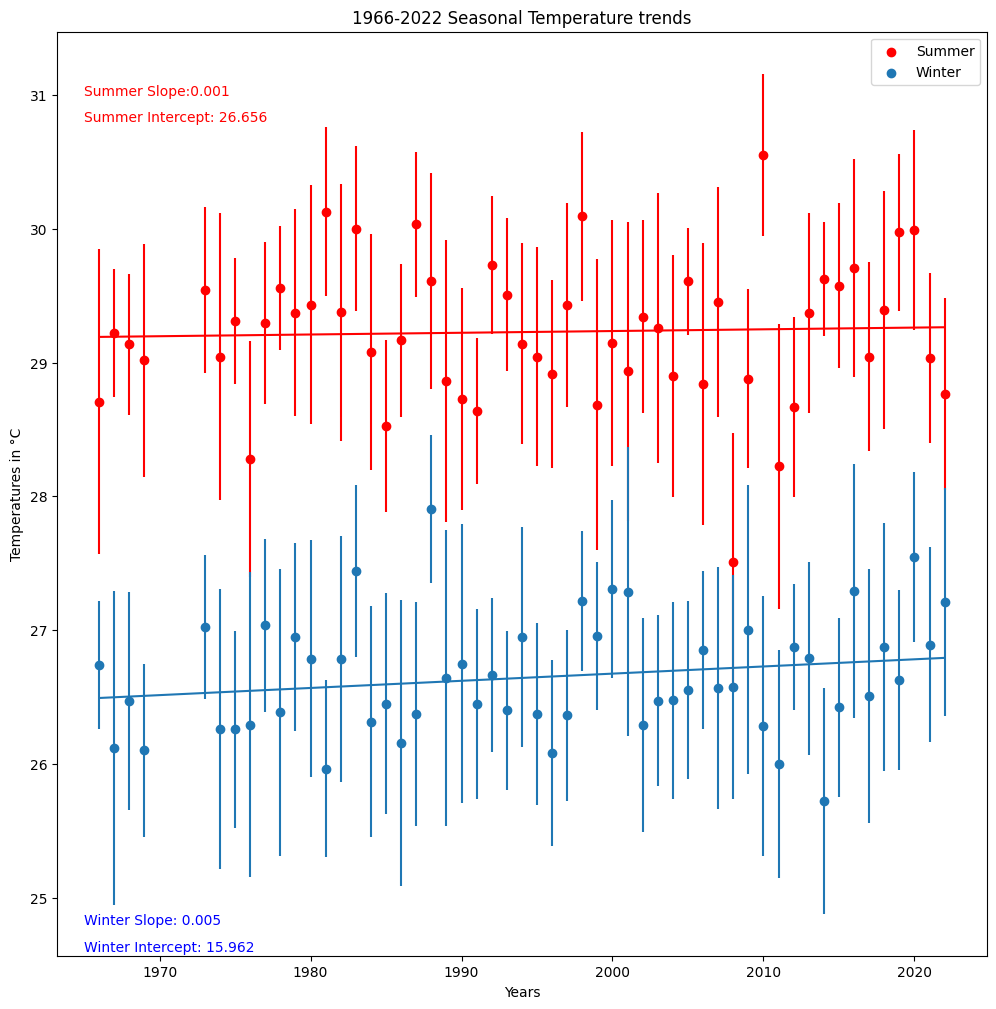

In [8]:
# Plot for all years goes here
import matplotlib.pyplot as plt

ax = None

# YOUR CODE HERE
fig, ax = plt.subplots(figsize = (12,12))

#plotting data
ax.scatter(x_time, y_summer, label = 'Summer', color = 'r')
ax.scatter(x_time, y_winter, label = 'Winter')
ax.set_xlabel('Years')
ax.set_ylabel('Temperatures in °C')
ax.set_title('1966-2022 Seasonal Temperature trends')
ax.legend()


#best fit line for summer
y1 = A_summer + B_summer * x_time.min()
y2 = A_summer + B_summer * x_time.max()
x1 = x_time.min()
x2 = x_time.max()

ax.plot([x1, x2], [y1, y2], color='red')
ax.text(1965, 31, f"Summer Slope:{B_summer:.3f}", color='red')
ax.text(1965, 30.8, f"Summer Intercept: {A_summer:.3f}", color='red')

#best fit line for winter
y3 = A_winter + B_winter * x_time.min()
y4 = A_winter + B_winter * x_time.max()
x3 = x_time.min()
x4 = x_time.max()

ax.plot([x3, x4], [y3, y4])
ax.text(1965, 24.8, f"Winter Slope: {B_winter:.3f}", color='blue')
ax.text(1965, 24.6, f"Winter Intercept: {A_winter:.3f}", color='blue')

#error bars showing standard deviations 
winter_error = np.array(data['Jan std'])
summer_error = np.array(data['May std'])
ax.errorbar(x_time, y_summer, yerr=summer_error, fmt='none', ecolor='r')
ax.errorbar(x_time, y_winter, yerr=winter_error, fmt='none')

Figure 1. The Mactan, Cebu seasonal temperature trends during summer and winter from 1966 - 2022. The summer trend line (red line) shows relatively lower variations compared to the winter trend line (blue line), as reflected by the higher intercept value and more gentler slope. 

<ErrorbarContainer object of 3 artists>

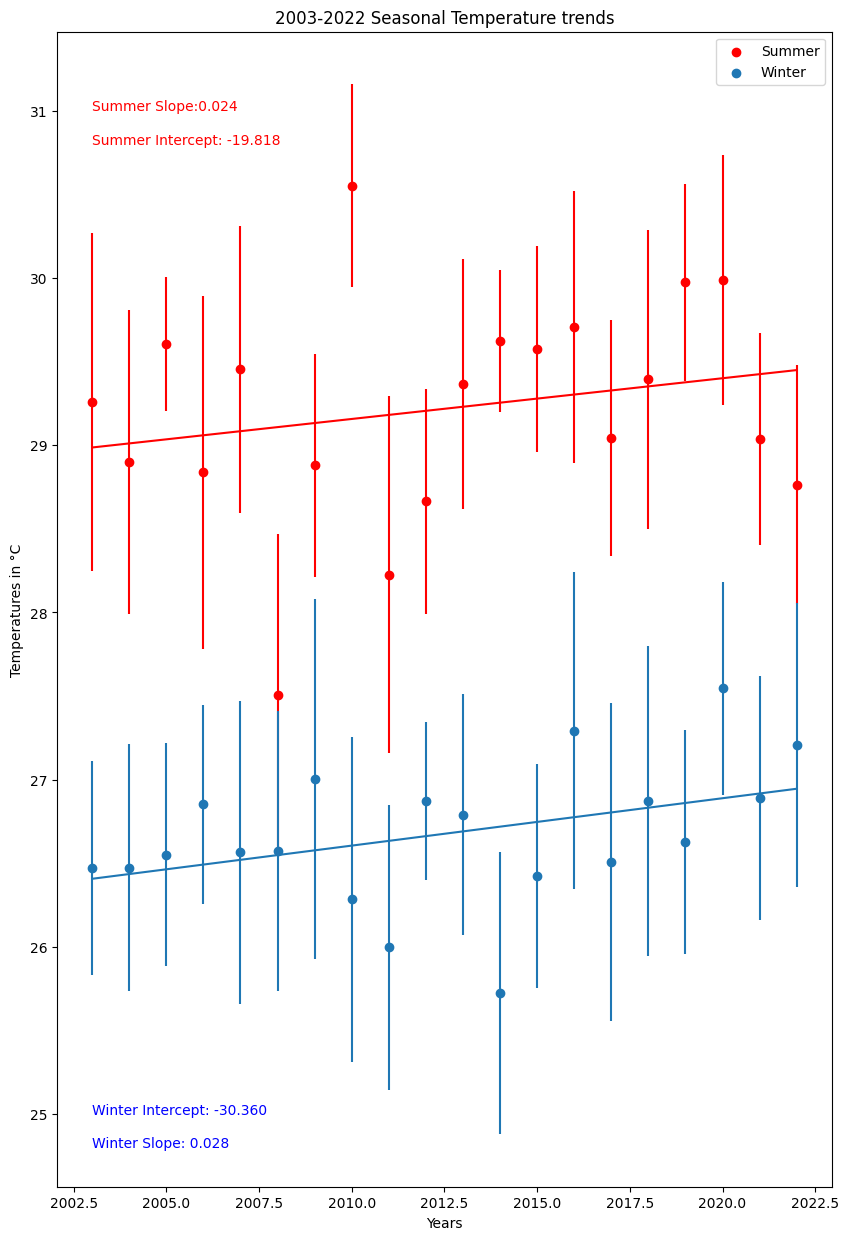

In [9]:
# Plot for last 20 years goes here

ax2 = None

# YOUR CODE HERE
fig, ax2 = plt.subplots(figsize = (10,15))

#plotting data
ax2.scatter(x_time20, y_summer20, label = 'Summer', color = 'r')
ax2.scatter(x_time20, y_winter20, label = 'Winter')
ax2.set_xlabel('Years')
ax2.set_ylabel('Temperatures in °C')
ax2.set_title('2003-2022 Seasonal Temperature trends')
ax2.legend()


#best fit line for summer
y5 = A_summer20 + B_summer20 * x_time20.min()
y6 = A_summer20 + B_summer20 * x_time20.max()
x5 = x_time20.min()
x6 = x_time20.max()

ax2.plot([x5, x6], [y5, y6], color='red')
ax2.text(2003, 31, f"Summer Slope:{B_summer20:.3f}", color='red')
ax2.text(2003, 30.8, f"Summer Intercept: {A_summer20:.3f}", color='red')

#best fit line for winter
y7 = A_winter20 + B_winter20 * x_time20.min()
y8 = A_winter20 + B_winter20 * x_time20.max()
x7 = x_time20.min()
x8 = x_time20.max()

ax2.plot([x7, x8], [y7, y8])
ax2.text(2003, 24.8, f"Winter Slope: {B_winter20:.3f}", color='blue')
ax2.text(2003, 25, f"Winter Intercept: {A_winter20:.3f}", color='blue')

#error bars showing standard deviations 
winter20_error = np.array(data['Jan std'].loc[(data['Year'] >= 2003) &  (data['Year'] <= 2022)])
summer20_error = np.array(data['May std'].loc[(data['Year'] >= 2003) &  (data['Year'] <= 2022)])
ax2.errorbar(x_time20, y_summer20, yerr = summer20_error, fmt='none', ecolor='r')
ax2.errorbar(x_time20, y_winter20, yerr = winter20_error, fmt='none')

Figure 2. The red and blue lines show the trends for summer and winter temperature variations in the last 20 years, respectively. Both trend lines show a steeper slopes and negative y-intercept values. 

## Problem 2 - Linear correlation: Is a line a good fit for our data? (6 points)

In Problem 1 we used least squares regressions to calculate lines that best fit our data. One thing we did not consider, however, was whether a line was a suitable model for our data. To consider this another way, we could ask ourselves how well do our data plot on a line? This question will be the focus of Problem 2, where we will calculate the linear correlation coefficient $r$ to explore how well our data fall on a line. Notably, in doing this we will *not* consider the standard deviations in our seasonal temperatures, only the mean values for the different seasons.

### Scores for this problem

**Your score on this problem will be based on following criteria**:

- Properly converting the linear correlation coefficient formula to a Python function and adding it to your `gdam_functions.py` script file.
- Calculating linear corelation coefficients for summer and winter and for the two different time periods
- Plotting your results
- Including comments that explain what most lines in the code do
- Uploading your notebook and modified script file to your GitHub repository for this week's exercise

### Part 1: A correlation coefficient function (1.5 points)

As we have seen in this week's lesson, the correlation coefficient $r$ can be used to determine how well two variables are linearly correlated with one another. In other words, how well does a line relate the two. Mathematically, we can define the correlation coefficient $r$ as

\begin{equation}
  \Large
  r = \frac{\sum{\left(x_{i} - \bar{x} \right)\left(y_{i} - \bar{y} \right)}}{\sqrt{\sum{\left(x_{i} - \bar{x} \right)^2} \sum{\left(y_{i} - \bar{y} \right)^2}}},
\end{equation}

where $x_{i}$ is the $i$th value along the $x$-axis, $\bar{x}$ is the mean of the values on the $x$-axis, and similarly for the values of $y$.

Your task in this part of the problem is to make a function for calculating $r$.

- Create a function `pearson()` in your `gdam_functions.py` script file that returns the correlation coefficient $r$ between two variables `x` and `y`

In [10]:
# Import your new function below using the format "from introqg_functions import pearson"
# (just copy and paste the text in quotes above in place of "raise NotImplementedError()")

# YOUR CODE HERE
from gdam_functions_updated import pearson
import numpy as np

In [11]:
# These visible tests with fake data should work
from nose.tools import ok_, assert_equal

# Fake data for pearson tests
x1 = np.array([1.0, 2.0, 3.0])
y1 = np.array([1.0, 2.0, 2.1])
x2 = np.array([1.0, 2.0, 2.5, 3.6, 4.2, 5.9])
y2 = np.array([5.7, 4.2, 3.6, 5.4, 2.0, 1.0])

# Fake correlation coefficients
r1 = pearson(x1, y1)
r2 = pearson(x2, y2)

# Print results
print(f"Correlation coefficient for dataset 1: {r1:.4f}.")
print(f"Correlation coefficient for dataset 2: {r2:.4f}.")

# Check that the pearson function works
assert_equal(round(r1, 4), 0.9042)
assert_equal(round(r2, 4), -0.8156)

Correlation coefficient for dataset 1: 0.9042.
Correlation coefficient for dataset 2: -0.8156.


### Part 2: Calculating correlation coefficients (1.5 points)

Next, we can calculate the correlation coefficients for our weather data.

- Calculate correlation coefficients for the summer and winter and for both time ranges (the entire range of years, and 2003-2022) using your `pearson()` function.
You should name these values as follows:
    - Entire range of years: `r_winter` for winter and `r_summer` for summer
    - Last 20 years: `r_winter20` for winter, `r_summer20` for summer

In [12]:
r_winter = None
r_summer = None
r_winter20 = None
r_summer20 = None

# YOUR CODE HERE
#pearson() function retur
r_winter = pearson(x_time, y_winter)
r_summer = pearson(x_time, y_summer)
r_winter20 = pearson(x_time20, y_winter20)
r_summer20 = pearson(x_time20, y_summer20)

In [13]:
# This test should work
print(f"Your winter (all years) correlation coefficient: {r_winter:.4f}. Expected value: 0.1966.")


Your winter (all years) correlation coefficient: 0.1966. Expected value: 0.1966.


In [14]:
# This test should work
print(f"Your summer (last 20 years) correlation coefficient: {r_summer20:.4f}. Expected value: 0.2144.")


Your summer (last 20 years) correlation coefficient: 0.2144. Expected value: 0.2144.


### Part 3: Plotting your results, round 2 (3 points)

Now we can generate a pair of plots showing the data along with the calculated $r$ values.

- Create 2 plots of the seasonal temperature data: (**1**) one for the entire time covered in the data and (**2**) another for the last 20 years of data
    - Plot the seasonal average temperature data as a Pandas scatter plot **without** error bars for the standard deviation in seasonal temperature
    - Also include the regression lines for each season from Problem 1 to compare to the yearly temperature data. You may want to consult [the hints for this week's exercise](https://introqg-site.readthedocs.io/en/latest/lessons/L2/exercise-2.html) about how to plot the regression lines.
    - Plot the temperature data for both seasons on the same plot, using a warm color (e.g., red) for summer and a cool color (e.g., blue) for winter. You can find some convenient color names you can use in the [Matplotlib documentation online](https://matplotlib.org/stable/gallery/color/named_colors.html).
    - Be sure to set the figure size to be slightly larger, as was done in Exercise 8
- Include axis labels, a title and a legend for each plot, as well as text displaying the correlation coefficients for both the summer and winter seasons
    - If your plot legend is empty, be sure that you have a label included for the scatter plot for each season with the text name of that season
- Add figure captions in the Markdown cell below each Python cell for your plots that describe the plots as if they were in a scientific journal article

<ErrorbarContainer object of 3 artists>

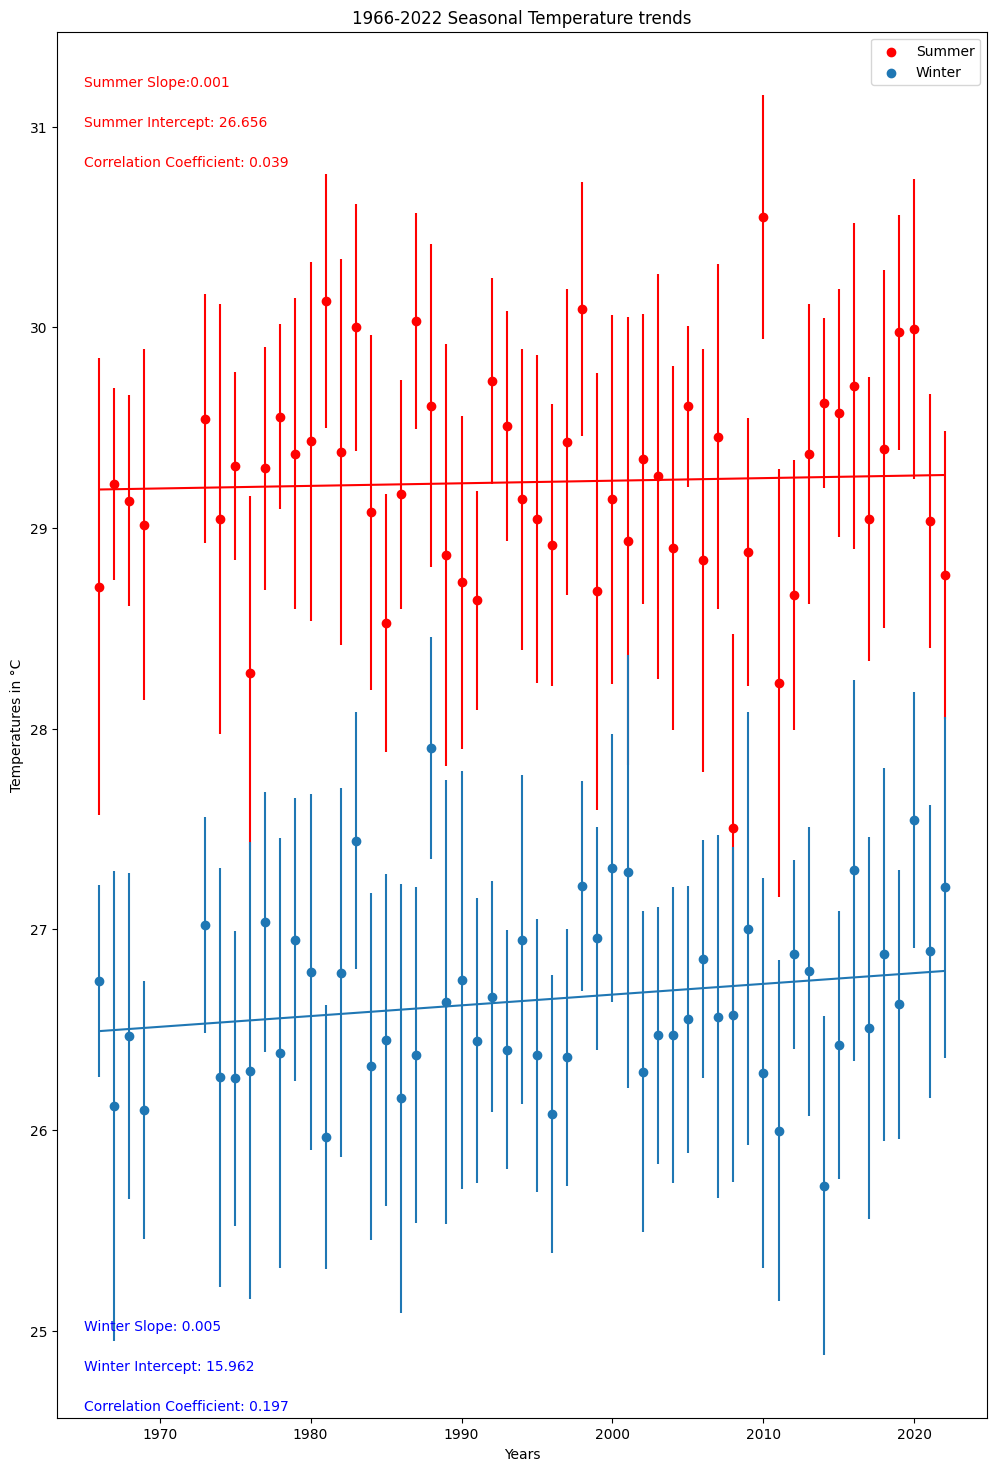

In [15]:
# Plot for all years goes here

ax3 = None

# YOUR CODE HERE
fig, ax3 = plt.subplots(figsize = (12,18))

#plotting data
ax3.scatter(x_time, y_summer, label = 'Summer', color = 'r')
ax3.scatter(x_time, y_winter, label = 'Winter')
ax3.set_xlabel('Years')
ax3.set_ylabel('Temperatures in °C')
ax3.set_title('1966-2022 Seasonal Temperature trends')
ax3.legend()


#best fit line for summer
y9 = A_summer + B_summer * x_time.min()
y10 = A_summer + B_summer * x_time.max()
x9 = x_time.min()
x10 = x_time.max()

ax3.plot([x9, x10], [y9, y10], color='red')
ax3.text(1965, 31.2, f"Summer Slope:{B_summer:.3f}", color='red')
ax3.text(1965, 31, f"Summer Intercept: {A_summer:.3f}", color='red')
ax3.text(1965, 30.8, f"Correlation Coefficient: {r_summer:.3f}", color='red')

#best fit line for winter
y9 = A_winter + B_winter * x_time.min()
y10 = A_winter + B_winter * x_time.max()
x9 = x_time.min()
x10 = x_time.max()

ax3.plot([x9, x10], [y9, y10])
ax3.text(1965, 25, f"Winter Slope: {B_winter:.3f}", color='blue')
ax3.text(1965, 24.8, f"Winter Intercept: {A_winter:.3f}", color='blue')
ax3.text(1965, 24.6, f"Correlation Coefficient: {r_winter:.3f}", color='blue')

#error bars showing standard deviations 
winter_error = np.array(data['Jan std'])
summer_error = np.array(data['May std'])
ax3.errorbar(x_time, y_summer, yerr=summer_error, fmt='none', ecolor='r')
ax3.errorbar(x_time, y_winter, yerr=winter_error, fmt='none')

Figure 3. The Mactan, Cebu seasonal temperature trends during summer and winter from 1966 - 2022. The low correlation coefficient values indicate a poor linear match for the observed and predicted values.

<ErrorbarContainer object of 3 artists>

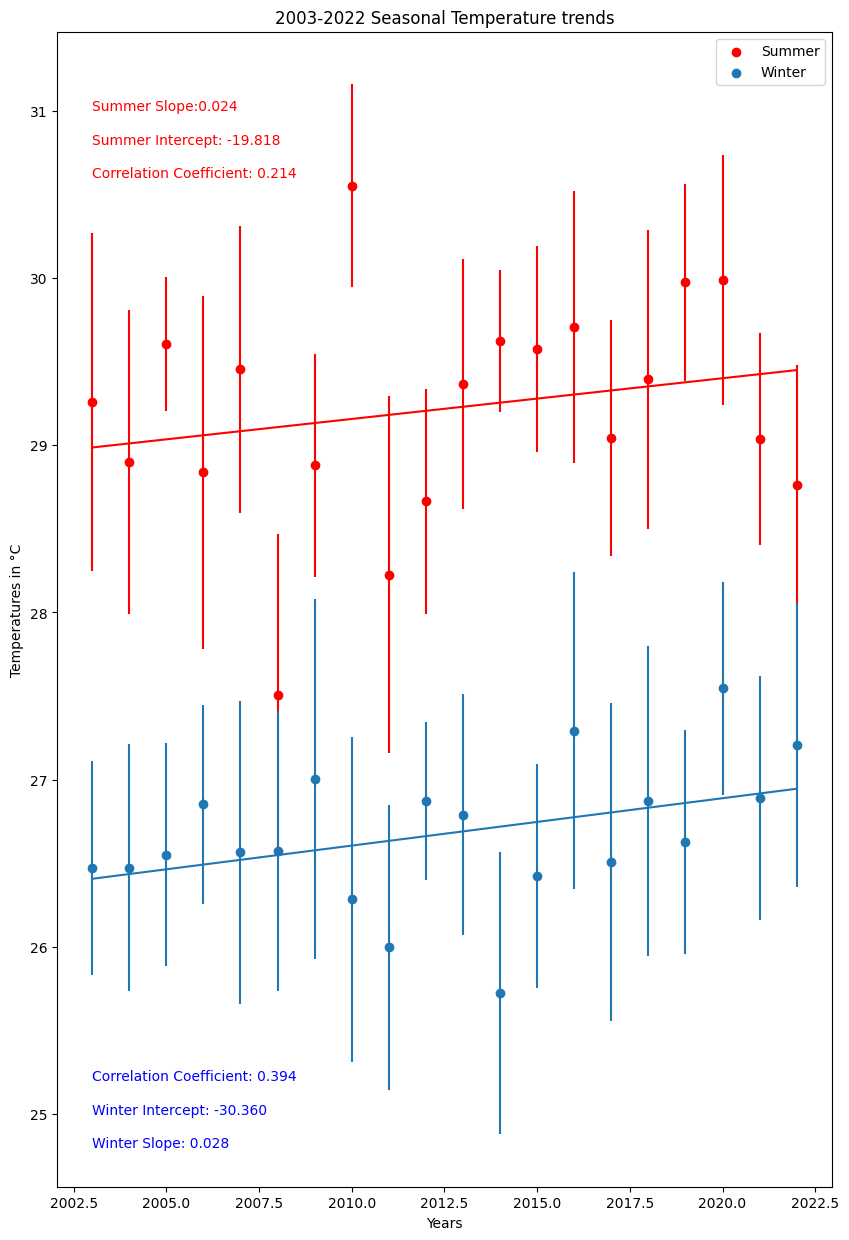

In [16]:
# Plot for the last 20 years goes here

ax4 = None

# YOUR CODE HERE
fig, ax4 = plt.subplots(figsize = (10,15))

#plotting data
ax4.scatter(x_time20, y_summer20, label = 'Summer', color = 'r')
ax4.scatter(x_time20, y_winter20, label = 'Winter')
ax4.set_xlabel('Years')
ax4.set_ylabel('Temperatures in °C')
ax4.set_title('2003-2022 Seasonal Temperature trends')
ax4.legend()


#best fit line for summer
y11 = A_summer20 + B_summer20 * x_time20.min()
y12 = A_summer20 + B_summer20 * x_time20.max()
x11 = x_time20.min()
x12 = x_time20.max()

ax4.plot([x11, x12], [y11, y12], color='red')
ax4.text(2003, 31, f"Summer Slope:{B_summer20:.3f}", color='red')
ax4.text(2003, 30.8, f"Summer Intercept: {A_summer20:.3f}", color='red')
ax4.text(2003, 30.6, f"Correlation Coefficient: {r_summer20:.3f}", color='red')

#best fit line for winter
y11 = A_winter20 + B_winter20 * x_time20.min()
y12 = A_winter20 + B_winter20 * x_time20.max()
x11 = x_time20.min()
x12 = x_time20.max()

ax4.plot([x7, x8], [y7, y8])
ax4.text(2003, 24.8, f"Winter Slope: {B_winter20:.3f}", color='blue')
ax4.text(2003, 25, f"Winter Intercept: {A_winter20:.3f}", color='blue')
ax4.text(2003, 25.2, f"Correlation Coefficient: {r_winter20:.3f}", color='blue')

#error bars showing standard deviations 
winter20_error = np.array(data['Jan std'].loc[(data['Year'] >= 2003) &  (data['Year'] <= 2022)])
summer20_error = np.array(data['May std'].loc[(data['Year'] >= 2003) &  (data['Year'] <= 2022)])
ax4.errorbar(x_time20, y_summer20, yerr = summer20_error, fmt='none', ecolor='r')
ax4.errorbar(x_time20, y_winter20, yerr = winter20_error, fmt='none')

Figure 4. Similar to figure 3, the model for temperature variation over the last 20 years show poor prediction, as represented by a generally low correlation coefficient values.

## Problem 3: Calculating a goodness-of-fit (3.5 points)

The final part of the exercise this week is to calculate a goodness-of-fit for the lines fit to the data in Problem 1. The idea here is to consider that we have an expected value of the temperature based on our least-squares regressions, and we can see how well those expected values fit within the standard deviation of the seasonal temperatures.

### Scores for this problem

**Your score on this problem will be based on following criteria**:

- Properly converting the goodness-of-fit formula to a Python function and adding that function to your `gdam_functions.py` script file
- Calculating goodness-of-fit values for summer and winter and for the two different time periods
- Including comments that explain what most lines in the code do
- Uploading your notebook and modified script file to your GitHub repository for this week's exercise

### Part 1: A goodness-of-fit function (1.5 points)

We can start by creating a function to calculate the goodness-of-fit. For this, you can use the reduced chi-squared equation,

\begin{equation}
  \Large
  \chi^{2} = \frac{1}{N} \sum \frac{(O_{i} - E_{i})^{2}}{\sigma_{i}^2}
\end{equation}

where $N$ is the number of ages, $O_{i}$ is the $i$th observed value, $E_{i}$ is the $i$th expected value, and $\sigma_{i}$ is the $i$th standard deviation.

For this part you should:

- Create a function called `chi_squared` in your `gdam_functions.py` script file that can be used to calculate the reduced chi-squared value

In [17]:
# Import your new function below using the format "from introqg_functions import chi_squared"
# (just copy and paste the text in quotes above in place of "raise NotImplementedError()")

# YOUR CODE HERE
from gdam_functions_updated import chi_squared
import numpy as np

In [18]:
# These visible tests with fake data should work
from nose.tools import ok_, assert_equal

# Fake data
obs1 = np.array([1.1, 2.9, 2.6, 3.5, 5.7, 2.8])
exp1 = np.array([1.5, 2.4, 3.6, 1.5, 6.7, 2.6])
std1 = np.array([0.5, 1.4, 0.6, 1.5, 0.7, 1.0])

obs2 = np.array([1.8, 2.3, 2.2, 3.9, 5.5, 2.4])
exp2 = np.array([1.2, 2.0, 3.9, 1.7, 6.1, 2.9])
std2 = np.array([0.2, 0.4, 1.6, 2.5, 0.5, 0.3])

# Fake goodness-of-fit values
cs1 = chi_squared(obs1, exp1, std1)
cs2 = chi_squared(obs2, exp2, std2)

# Print results
print(f"Goodness-of-fit for dataset 1: {cs1:.4f}.")
print(f"Goodness-of-fit for dataset 2: {cs2:.4f}.")

# Check that the chi-squared function works
assert_equal(round(cs1, 4), 1.2340)
assert_equal(round(cs2, 4), 2.6139)

Goodness-of-fit for dataset 1: 1.2340.
Goodness-of-fit for dataset 2: 2.6139.


### Part 2: Calculating goodness-of-fit (2 points)

Next, we can calculate the goodness-of-fit for each point along our line and the corresponding observed seasonal mean temperaure. We will do this by first creating arrays of expected temperature values for each season and time period, and then calculating the goodness-of-fit between those expected values and the observed temperatures.

- Create 4 arrays that contain the expected temperature value for each year based on the equation for the regression lines calculated in Problem 1
    - The variables `exp_winter` and `exp_summer` can be used for all years, while `exp_winter20` and `exp_summer20` can be used for the last 20 years
- Calculate the goodness-of-fit between the expected values and the observed mean seasonal temperatures
    - The variables `gof_winter` and `gof_summer` can be used for all years, while `gof_winter20` and `gof_summer20` can be used for the last 20 years

In [19]:
# Expected temperatures based on least-squares regression in Problem 1
exp_winter = np.array(A_winter + B_winter * x_time)
exp_summer = np.array(A_summer + B_summer * x_time)
exp_winter20 = np.array(A_winter20 + B_winter20 * x_time20)
exp_summer20 = np.array(A_summer20 + B_summer20 * x_time20)

#std values
winter_error = np.array(data['Jan std'])
summer_error = np.array(data['May std'])
winter20_error = np.array(data['Jan std'].loc[(data['Year'] >= 2003) &  (data['Year'] <= 2022)])
summer20_error = np.array(data['May std'].loc[(data['Year'] >= 2003) &  (data['Year'] <= 2022)])

# Goodness-of-fit values
gof_winter = chi_squared(y_winter, exp_winter, winter_error)
gof_summer = chi_squared(y_summer, exp_summer, summer_error)
gof_winter20 = chi_squared(y_winter20, exp_winter20, winter20_error)
gof_summer20 = chi_squared(y_summer20, exp_summer20, summer20_error)

# YOUR CODE HERE


In [20]:
# This test should work
print(f"My mean expected winter temperature: {mean(exp_winter):.4f}. Expected value: 26.6489.")


NameError: name 'mean' is not defined

In [21]:
# created new cell for running this line as the cell above can't be edited 
print(f"My mean expected winter temperature: {exp_winter.mean():.4f}. Expected value: 26.6489.")

My mean expected winter temperature: 26.6490. Expected value: 26.6489.


In [22]:
# This test should work
print(f"My summer (all years) goodness-of-fit: {gof_summer:.4f}. Expected value: 0.5692.")


My summer (all years) goodness-of-fit: 0.5692. Expected value: 0.5692.


In [23]:
# Run this cell to print all of your calculated goodness-of-fit values
print(f"My winter goodness-of-fit values:\n    All years:     {gof_winter:.4f}\n    Last 20 years: {gof_winter20:.4f}\n")
print(f"My summer goodness-of-fit values:\n    All years:     {gof_summer:.4f}\n    Last 20 years: {gof_summer20:.4f}")

My winter goodness-of-fit values:
    All years:     0.3890
    Last 20 years: 0.2378

My summer goodness-of-fit values:
    All years:     0.5692
    Last 20 years: 0.8161


## Summary questions for Exercise 2 (2 points; 0.5 points each)

Answer the questions below in a few sentences.

1. Based on the least-squares regressions calculated in Problem 1, how have summer and winter temperatures changed in Mactan over the time 1966-2022? Is the trend similar for both seasons? What about when you consider only the data over the last 20 years? Do you have any first-hand experience that relates to these temperature trends? If so, what?
2. Based on the calculation of the correlation coefficients in Problem 2, how well does it seem the data are fit by a line? Are there any significant differences between seasons or time periods in the calculated $r$ values?
3. Looking at the goodness-of-fit values calculated in Problem 3, how well does it appear the data are fit by a regression line? Do you see differences between seasons ot time period considered? 
4. Comparing the calculated $\chi^{2}$ values from Problem 3 to the $r$ values in Problem 2, what differences do you see in the numbers between seasons and/or time periods? Can you think of reasons why the $r$ and $\chi^{2}$ values might differ in terms of their relative values in each season/time period? How are the $r$ and $\chi^{2}$ values different in terms of what they measure?

YOUR ANSWER HERE

1. For problem 1, the summer trend line showed a smaller slope value compared to the winter values. The computed values also showed that the y-intercept value of the summer trend line has a larger value than the latter. On the other hand, the values generated from the data during the last 2 decades showed nearly similar slope values.

2. The results from the Pearson Correlation Coeefficient showed a generally weak linear behavior. During the whole observation period from 1966 to 2022, the results may suggest that the temperatures varies widely during the summer in comparison to the relatively higher correlation coefficient value from the winter season. On the other hand, the data from the last 2 decades suggest that during the summer season, the temperatures fluctuated more than the winter season, as typified by the relatively slightly lower correlation coefficient value.

3. Although both values displayed low values, it can be observed that the goodness of fit value for the winter season in the last 20 years is relatively lower in comparison to the result from the whole observation period, suggesting that the data from the winter season in the last 2 decades weakly fits compared to the data from the 1966 to 2022. Additionally, the summer dataset from the last 20 years resulted an elevated value, which indicates a relatively good fit around the trend line in contrast to the recorded temperatures from the whole observation period.

4.The chi squared (goodness of fit) and pearson correlation coefficient values are two different equations that aims to describe a dataset. The former is used to characterize how well the observed data fits with the model, while the latter describes the linear behavior between two variables. 

4b. The degree of variability in values may be influenced by varying seasonal patterns that were observed during the whole observation period (1966-2022) and were not recorded in the last 2 decades of monitoring. Hence, smaller dataset from the last 20 years only showed a fragment with more linear correlation. Also, there may be other factors that were not captured in the model which caused the low GoF values for the winter season. 

